In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [10]:
#Find the number of papers per year from SDSS-IV. 
surveys = ["SDSSIII", "SDSSIV", "SDSSV"]
n_papers = dict()
for survey in surveys:
    cat = open("{}_pubs.txt".format(survey))
    n_papers[survey] = dict()
    for line in cat:
        if line[0]=="#":
            continue
        if re.search("\((\d\d\d\d)\)", line):
            m = re.search("\((\d\d\d\d)\)", line)
            year = m.group(1)
            if year in n_papers[survey]:
                n_papers[survey][year] += 1
            else:
                n_papers[survey][year] = 1

In [11]:
for survey in surveys:
    print(survey, np.sum(list(n_papers[survey].values())))

SDSSIII 201
SDSSIV 426
SDSSV 26


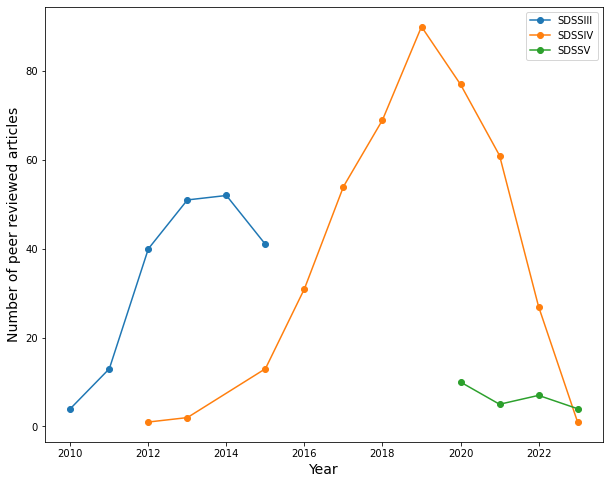

In [16]:
fig, ax = plt.subplots(1, figsize=(10,8))

for survey in surveys:
    keys = list(n_papers[survey].keys())
    keys.sort()
    x = np.zeros(len(keys))
    y = np.zeros(len(keys))
    for i, key in enumerate(keys):
        x[i] = int(float(key))
        y[i] = n_papers[survey][key]


    ax.plot(x, y, '-o', label=survey)

ax.legend()
ax.set_ylabel("Number of peer reviewed articles", fontsize=14)
ax.set_xlabel("Year", fontsize=14)
plt.show()
